### Introduction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
from cv2 import imread
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2
from subprocess import check_output
print(check_output(['ls', 'input']).decode('utf8'))

conversionRates.csv
freeformResponses.csv
multipleChoiceResponses.csv
RespondentTypeREADME.txt
schema.csv



In [2]:
response = pd.read_csv('input/multipleChoiceResponses.csv', encoding='ISO-8859-1')

In [3]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Some Basic Analysis

In [4]:
print('The total number of respondents:', 
      response.shape[0])
print('Total number of Countries with respondents:',
      response.Country.nunique())
print('Country with highest respondents:', response.Country.value_counts().index[0],
      'with', response.Country.value_counts().values[0], 'respondents')
print('Youngest respondent:' , np.min(response.Age), 
      ' and Oldest respondent', np.max(response.Age))

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent 100.0


### Gender Split

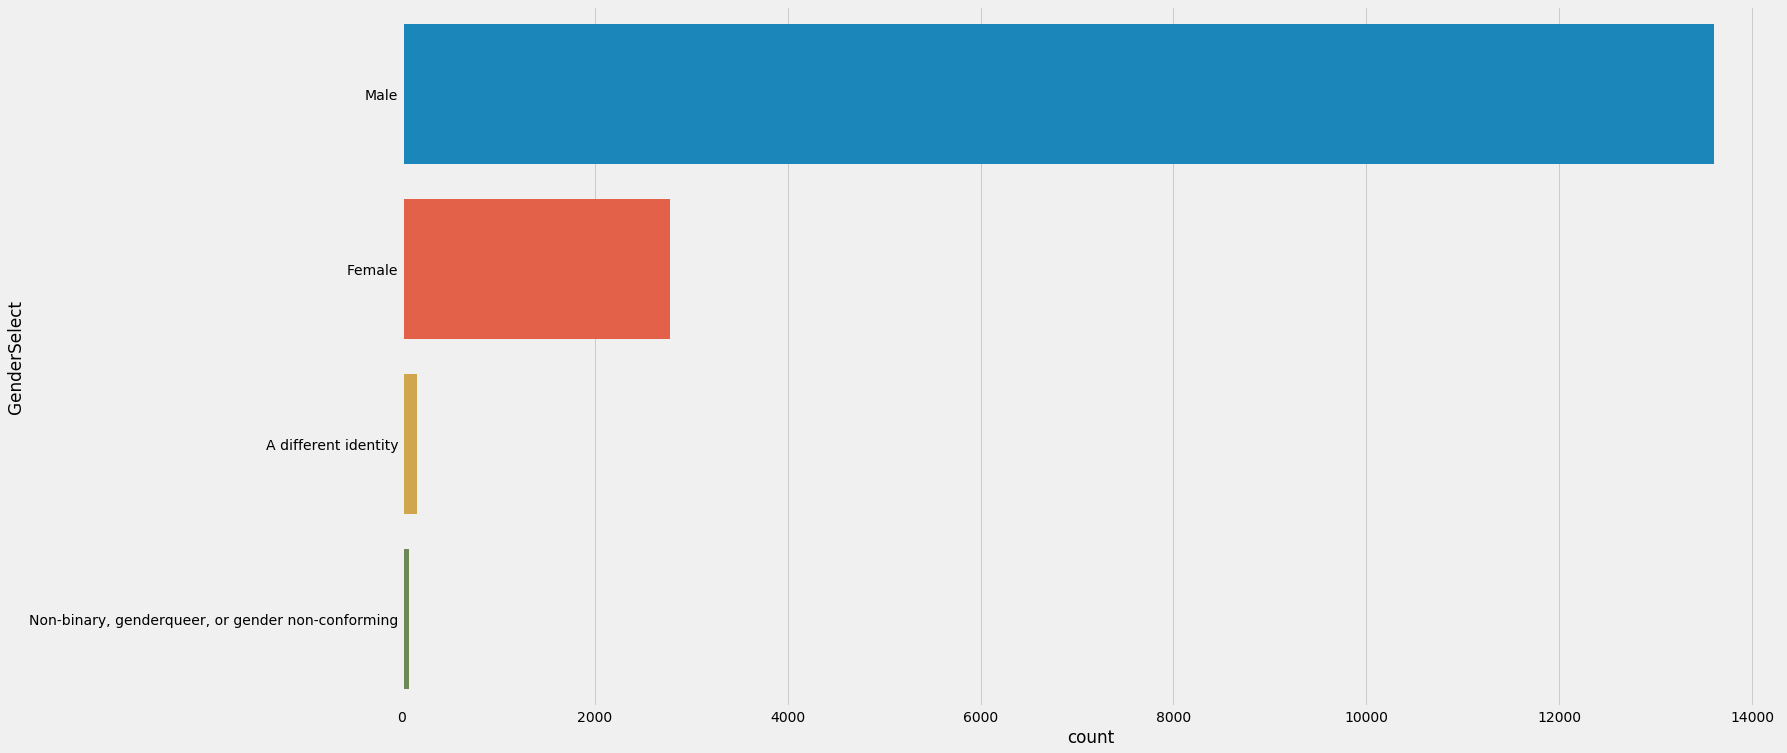

In [5]:
plt.subplots(figsize=(22, 12))
sns.countplot(y=response.GenderSelect, 
              order=response.GenderSelect.value_counts().index)
plt.show()

### Respondents By Country

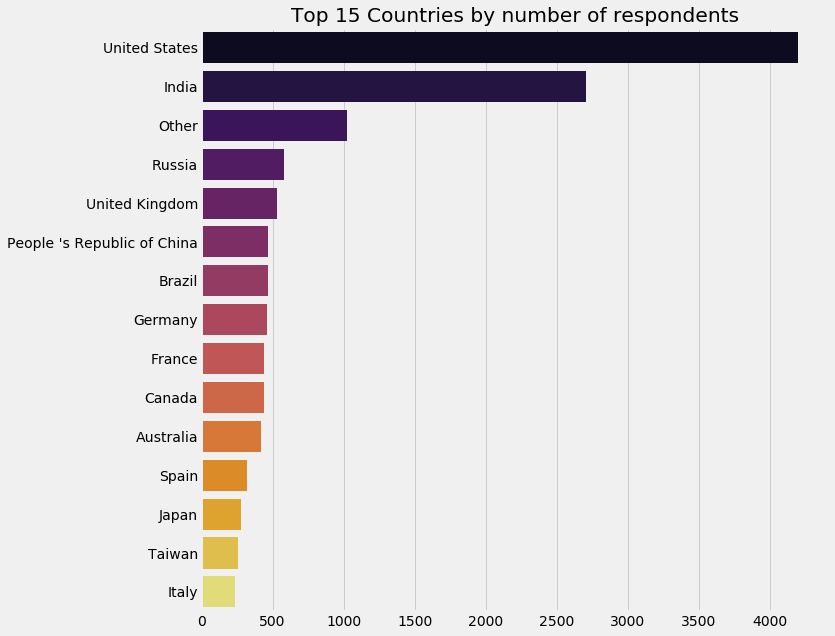

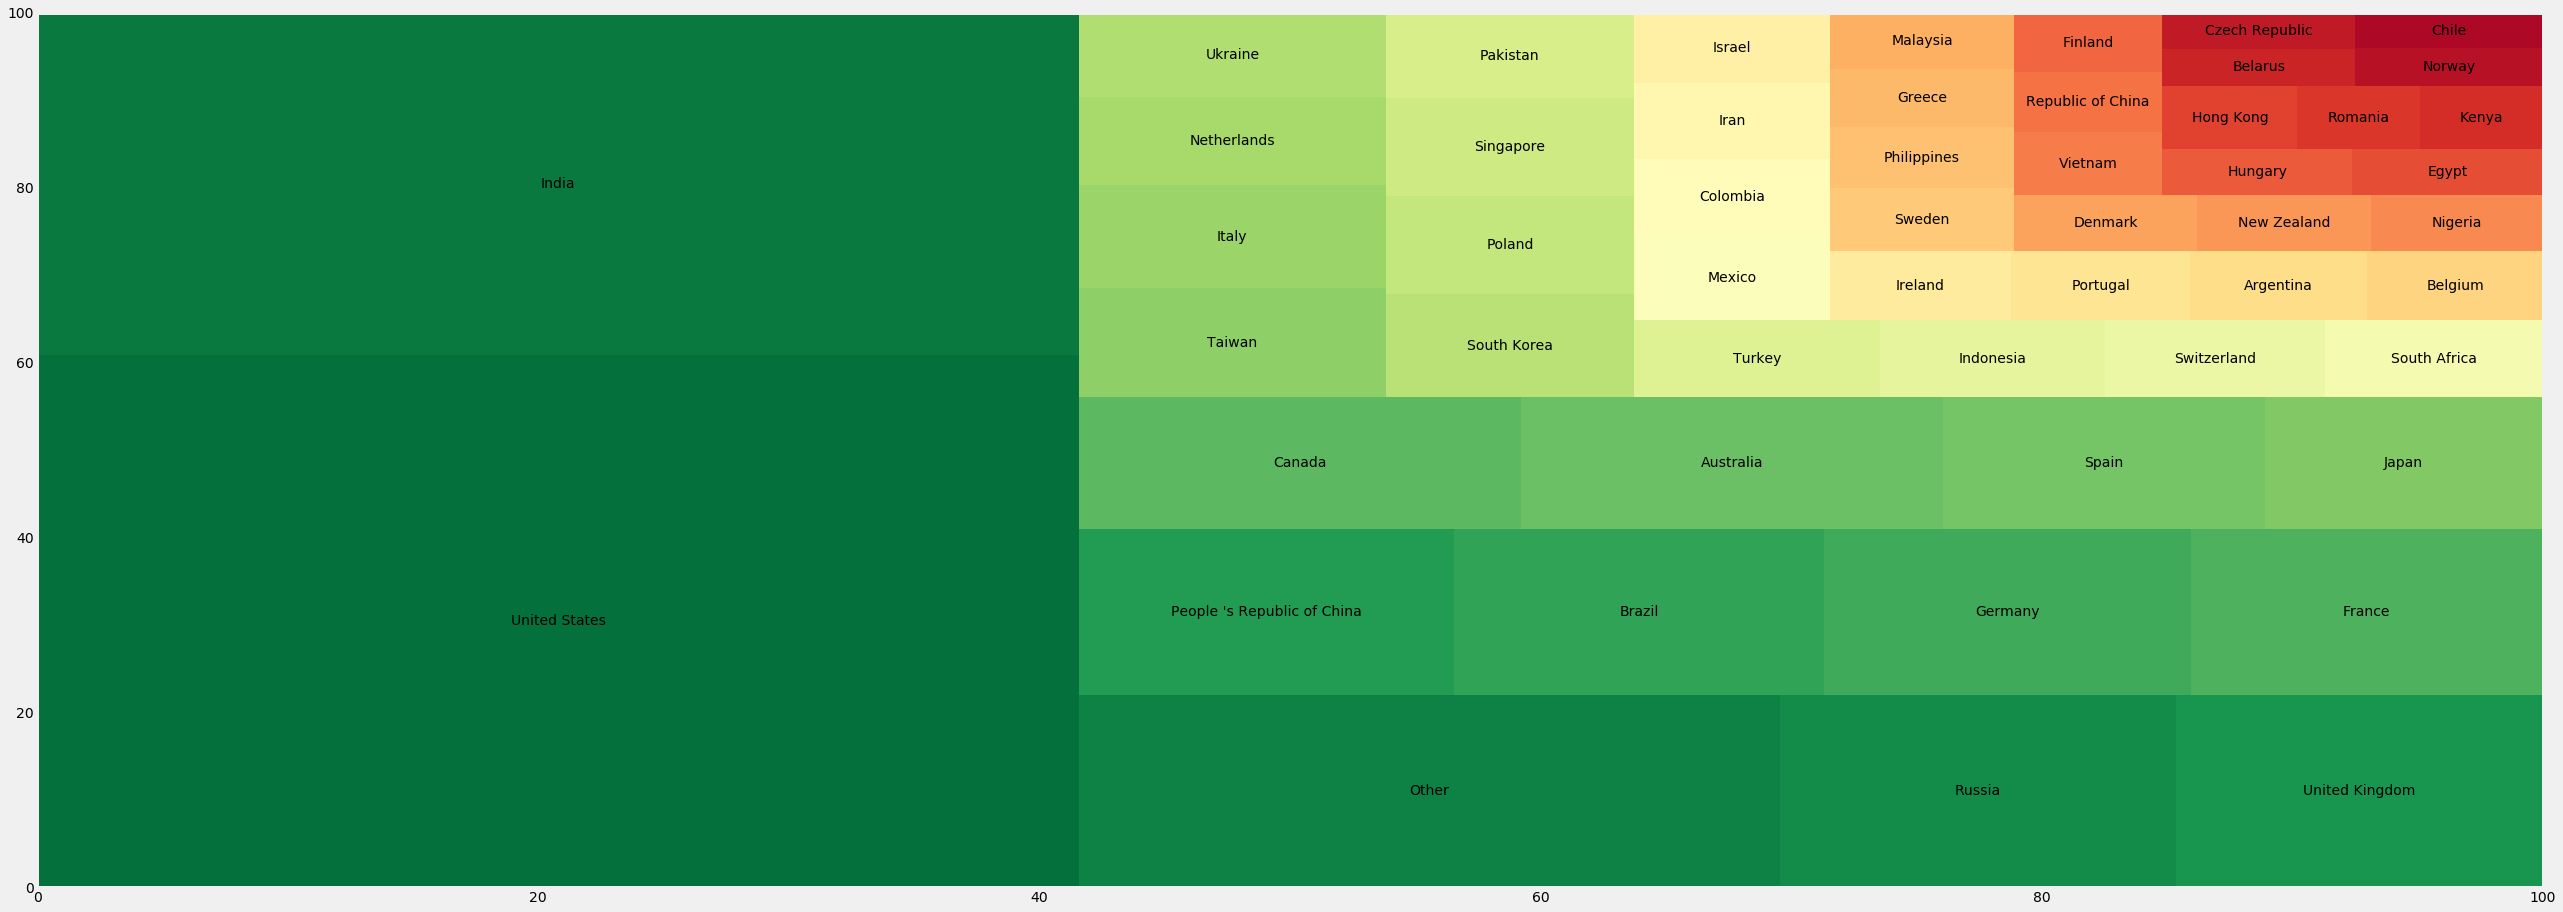

In [7]:
resp_coun = response.Country.value_counts()[:15].to_frame()
sns.barplot(resp_coun.Country, resp_coun.index, palette='inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

tree = response.Country.value_counts().to_frame()
squarify.plot(sizes=tree.Country.values, label=tree.index, 
              color=sns.color_palette('RdYlGn_r', 52))
plt.rcParams.update({'font.size': 20})
fig = plt.gcf()
fig.set_size_inches(40, 15)
plt.show()

### Compensation
Data Scientists are one of the most highest payed individuals. Lets check what the surveyors say

In [16]:
response.CompensationAmount = response.CompensationAmount.str.replace(',', '')
response.CompensationAmount = response.CompensationAmount.str.replace('-', '')

rates = pd.read_csv('input/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)

salary = response[['CompensationAmount', 
                   'CompensationCurrency', 
                   'GenderSelect', 
                   'Country', 
                   'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

print('Maximum Salary is USD $', salary.Salary.dropna().astype(int).max())
print('Minimum Salary is USD $', salary.Salary.dropna().astype(int).min())
print('Median Salary is USD $', salary.Salary.dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


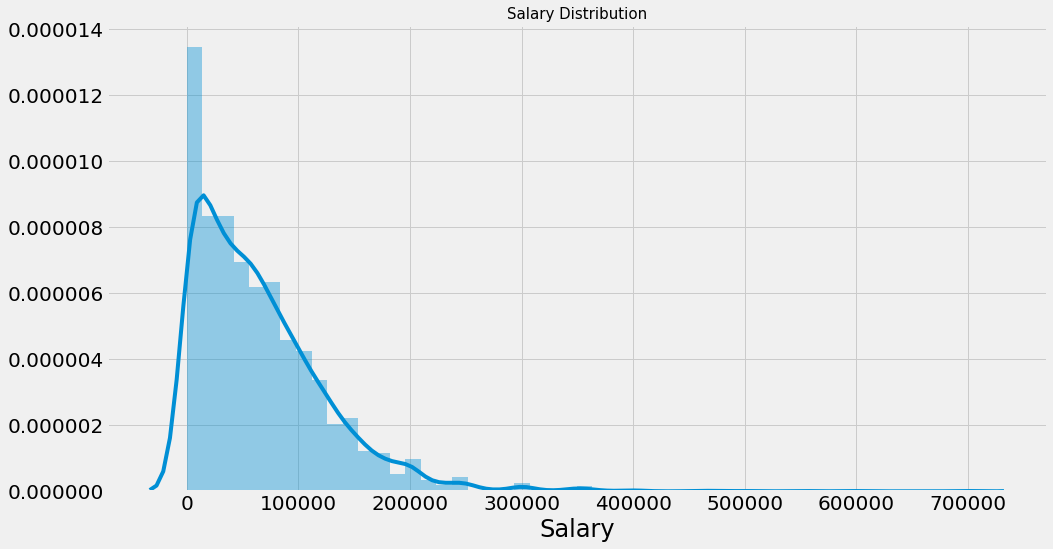

In [17]:
plt.subplots(figsize=(15, 8))
salary = salary[salary['Salary'] < 1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution', size=15)
plt.show()

### Compensation by Country

In [25]:
salary.groupby('Country')['Salary'].median().sort_values(ascending=False).to_frame()

,Salary
Country,
United States,107000.0000
Switzerland,104338.2000
Australia,93469.1150
Norway,87875.4000
Denmark,80365.0000
Israel,74852.5680
Netherlands,74141.2120
Sweden,72803.4480
Germany,71749.5600


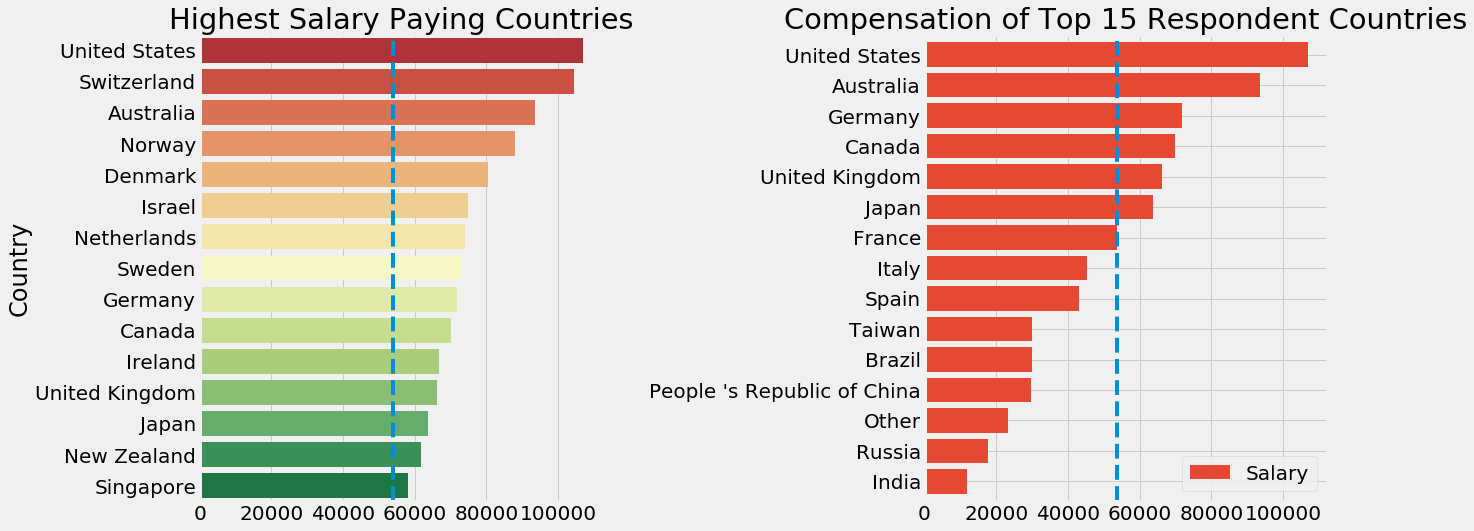

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sal_coun = salary.groupby('Country')['Salary'].median().\
sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary', sal_coun.index,
            data=sal_coun,
            palette='RdYlGn',
            ax=ax[0])
ax[0].axvline(salary['Salary'].median(), linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')

max_coun = salary.groupby('Country')['Salary'].median().to_frame()
max_coun = max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary', ascending=True).plot.\
barh(width=0.8, ax=ax[1], color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(), linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

The left graph shows the Top 15 high median salary paying countries.  
It is good to see that these countries provide salary more than the median salary of the complete dataset.  
Similarity, the right graph shows median salary of the Top 15 Countries by respondents. The most shocking graph is for **India**. India has the 2nd highest respondents, but still it has the lowest median salary in the graph. Individual